In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = "{:,.2f}".format

# **Analisi dati: clienti di un e-commerce**

**Behavioral Data Science**

_"La combinazione multidisciplinare di Data Science e analisi del comportamento umano che rende possibile prendere decisioni strategiche"_

### **DataSet**

Il dataset preso in esame contiene dati sul comportamento dei clienti di un grande negozio online multi-categoria ed è stato reso pubblico per una competizione su Kaggle (https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store).

Ogni riga nel dataset rappresenta un evento(visualizzazione prodotto, inserimento nel carrello del prodotto, rimozione dal carello, acquisto).

A causa delle dimensioni del dataset (14Gb) e dato lo scopo puramente didattico, analizzeremo solo i dati relativi al mese di ottobre.

# **Analisi dei Dati**


# **Comprensione dei dati - Visualizzazione**


In [2]:
df = pd.read_csv('2019-Oct.csv')

In [3]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,"1,081.98",535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


### **Descrizione dei dati**

- **event_time**: Data e ora della generazione dell'evento (in UTC).
- **event_type**: tipo di evento.
- **product_id**: ID di un prodotto
- **category_id**: ID della categoria di un prodotto
- **category_code**: Categoria di prodotto (nome in codice), se possibile. Solitamente presente per categorie significative e ignorato per diverse tipologie di prodotti.
- **brand**: Nome del Brand.
- **price**: Prezzo del Prodotto.
- **user_id**: ID di un utente registrato.
- **user_session**: ID sessione dell'utente. Lo stesso per ogni sessione utente. Viene modificato ogni volta che l'utente torna al negozio online dopo una lunga pausa.


Gli eventi possono essere:

- visualizzazione: un utente ha visualizzato un prodotto
- carrello: un utente ha aggiunto un prodotto al carrello
- rimozione dal carello: un utente ha rimosso un prodotto dal carrello
- acquisto: un utente ha acquistato un prodotto.

Acquisti multipli per sessione: in una sessione possono esserci più eventi di acquisto.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [5]:
# L'attributo shape restituisce una tupla, che mostra quante righe e colonne abbiamo
df.shape

(42448764, 9)

In [6]:
print(f'Il dataset contiene {df.shape[0]} colonne e {df.shape[1]} righe')

Il dataset contiene 42448764 colonne e 9 righe


In [7]:
# valutiamo il numero totale di valori mancanti.
valori_nulli = df.isnull().sum()
print(valori_nulli)

print(f'Valori nulli totali {valori_nulli.sum()}')

event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64
Valori nulli totali 19632691


Solo 3 colonne hanno dati mancanti.


In [8]:
#percentuale di valori mancanti
print(df.isna().mean())

event_time      0.00
event_type      0.00
product_id      0.00
category_id     0.00
category_code   0.32
brand           0.14
price           0.00
user_id         0.00
user_session    0.00
dtype: float64


In [9]:
# identifichiamo il tipo dei dati
print(df.dtypes)

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object


In [10]:
# nomi delle colonne
print(df.columns)

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')


In [11]:
# Verifica dei dettagli statistici del dataset
print(df.describe().transpose())

                    count                         mean  \
product_id  42,448,764.00                10,549,932.38   
category_id 42,448,764.00 2,057,404,237,940,798,720.00   
price       42,448,764.00                       290.32   
user_id     42,448,764.00               533,537,147.51   

                                  std                          min  \
product_id              11,881,906.97                 1,000,978.00   
category_id 18,439,264,661,404,152.00 2,053,013,552,226,107,648.00   
price                          358.27                         0.00   
user_id                 18,523,738.17                33,869,381.00   

                                     25%                          50%  \
product_id                  1,005,157.00                 5,000,470.00   
category_id 2,053,013,555,464,110,592.00 2,053,013,555,631,882,752.00   
price                              65.98                       162.93   
user_id                   515,904,318.00               529,696,452

Osserviamo che in questo dataset solo la colonna del prezzo dovrebbe essere numerica.
Per ora si sta considerando "product_id", "category_id" e "user_id" come numerici. Cambiamolo.

In [12]:
# convertiamo il tipo di colonne
df = df.astype({"event_type": 'category', 
                "product_id": 'category',
                "category_id": 'category', 
                "category_code": 'category', 
                "brand": 'category',
                "user_id": 'category', 
                "user_session": 'category'
})

occorre trasformare 'event_time' in datetime per poterlo utilizzare almeglio.
con 'tz_convert(None)' rimuoviamo '+00' per comodità poichè tutti i dati appartengono allo stesso fuso orario

In [13]:
df['event_time'] = pd.to_datetime(df['event_time']).dt.tz_convert(None)

In [14]:
# identifichiamo nuovamente il tipo dei dati
print(df.dtypes)

event_time       datetime64[ns]
event_type             category
product_id             category
category_id            category
category_code          category
brand                  category
price                   float64
user_id                category
user_session           category
dtype: object


In [15]:
# Verifica dei dettagli statistici del dataset
print(df.describe().transpose())

              count   mean    std  min   25%    50%    75%      max
price 42,448,764.00 290.32 358.27 0.00 65.98 162.93 358.57 2,574.07


In [16]:
df.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8


## **Grafici ripielogativi**

Quanti sono le mie statistiche giornaliere?


In [17]:
#tabella visite e visitatori giornalieri
tabella_giornaliera = df.groupby(
    by=[df['event_time'].dt.normalize()]).agg(
    visite_giornaliere=('user_session', lambda x: x.nunique()),
    visitatori_giornalieri=('user_id', lambda x: x.nunique())
)

#tabella vendite giornaliere
filtro_vendite = df['event_type'] == 'purchase'
vendite = df.loc[filtro_vendite].groupby(by=[df['event_time'].dt.normalize()]).agg(
    numero_vendite_giornaliere=('event_type', 'count'),
    vendite_totali_giornaliere=('price', 'sum')
).reset_index()

# tabella complessiva statistiche giornaliere
tabella_giornaliera = pd.merge(left=tabella_giornaliera,
                               right=vendite,
                               left_on=['event_time'],
                               right_on=['event_time'],
                               how='left')

tabella_giornaliera['percentuale_di_conversioni'] = tabella_giornaliera['numero_vendite_giornaliere'] / tabella_giornaliera[
    'visite_giornaliere']

In [18]:
tabella_giornaliera.head(3)

,event_time,visite_giornaliere,visitatori_giornalieri,numero_vendite_giornaliere,vendite_totali_giornaliere,percentuale_di_conversioni
0,2019-10-01,268737,190188,19307,"6,275,964.01",0.07
1,2019-10-02,261252,184965,19469,"6,213,628.53",0.07
2,2019-10-03,241086,170668,19255,"6,233,782.98",0.08


Quante visite riceve il sito?

In [19]:
#Visite giornaliere
print('Statistiche delle visite giornaliere')
print('-'*50)
print(tabella_giornaliera['visite_giornaliere'].describe())
print('-'*50)
print('Statistica per data')
print('-'*50)
print(tabella_giornaliera.groupby(by=tabella_giornaliera['event_time'].dt.day_name(locale='Italian'))['visite_giornaliere'].describe())

Statistiche delle visite giornaliere
--------------------------------------------------
count        31.00
mean    299,510.55
std      25,531.55
min     241,086.00
25%     278,957.50
50%     301,219.00
75%     319,668.50
max     339,943.00
Name: visite_giornaliere, dtype: float64
--------------------------------------------------
Statistica per data
--------------------------------------------------
            count       mean       std        min        25%        50%  \
event_time                                                                
Domenica     4.00 309,080.00 32,756.35 273,034.00 285,634.75 311,671.50   
Giovedì      5.00 282,820.60 24,557.36 241,086.00 281,446.00 293,587.00   
Lunedì       4.00 293,353.00 26,033.15 263,437.00 276,610.00 294,346.50   
Martedì      5.00 301,032.40 27,672.77 268,737.00 276,723.00 308,348.00   
Mercoledì    5.00 295,314.60 27,194.96 261,252.00 274,906.00 301,219.00   
Sabato       4.00 298,041.75 19,140.22 276,914.00 286,412.75 296,976.50 

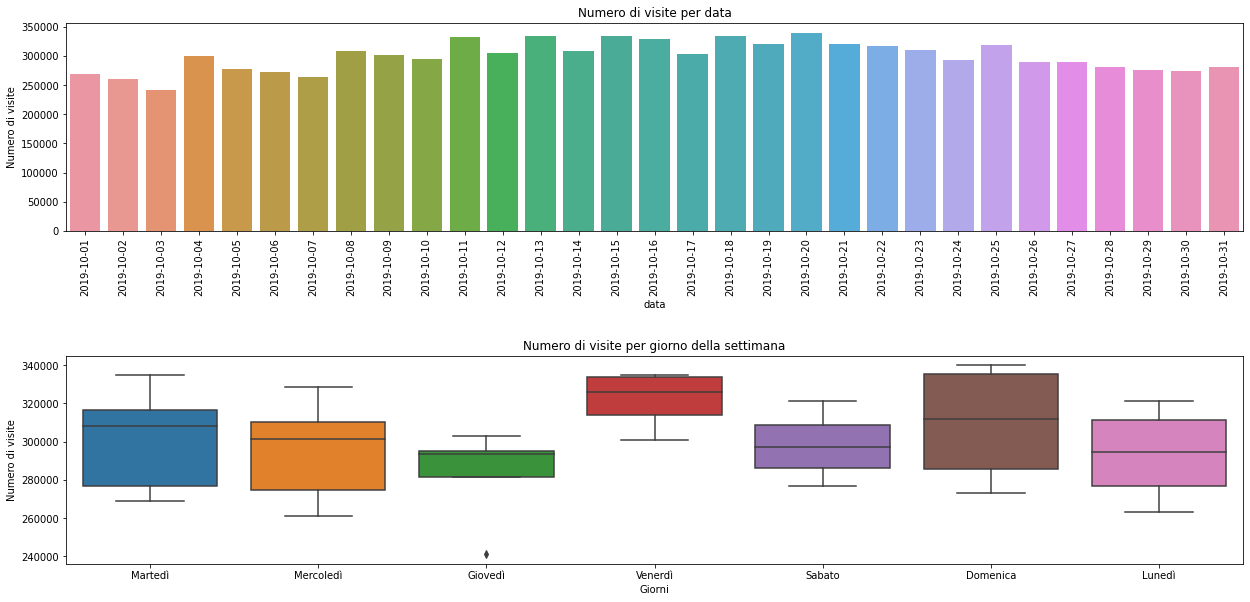

In [20]:
#Plottiamo Visite giornaliere
fig = plt.figure(figsize=(18, 9))

ax1 = fig.add_subplot(2, 1, 1)
sns.barplot(x=tabella_giornaliera['event_time'].dt.date,
            y='visite_giornaliere',
            data=tabella_giornaliera,
            ax=ax1
)
plt.xticks(rotation=90)

plt.title('Numero di visite per data')
plt.ylabel('Numero di visite')
plt.xlabel('data')

ax2 = fig.add_subplot(2, 1, 2)

sns.boxplot(x=tabella_giornaliera['event_time'].dt.day_name(locale='Italian'),
            y='visite_giornaliere',
            data=tabella_giornaliera,
            ax=ax2
)
plt.title('Numero di visite per giorno della settimana')
plt.ylabel('Numero di visite')
plt.xlabel('Giorni')
fig.tight_layout(pad=3.0)
plt.show()

Quanti clienti visitano il sito?

In [21]:
#Visite giornaliere
print('Statistiche dei visitatori giornalieri')
print('-'*50)
print(tabella_giornaliera['visitatori_giornalieri'].describe())
print('-'*50)
print('Statistica per data')
print('-'*50)
print(tabella_giornaliera.groupby(by=tabella_giornaliera['event_time'].dt.day_name(locale='Italian'))['visitatori_giornalieri'].describe())

Statistiche dei visitatori giornalieri
--------------------------------------------------
count        31.00
mean    208,829.77
std      16,233.61
min     170,668.00
25%     195,260.50
50%     208,477.00
75%     223,321.00
max     231,849.00
Name: visitatori_giornalieri, dtype: float64
--------------------------------------------------
Statistica per data
--------------------------------------------------
            count       mean       std        min        25%        50%  \
event_time                                                                
Domenica     4.00 213,090.00 18,707.44 193,210.00 199,321.75 213,650.50   
Giovedì      5.00 197,994.80 15,736.89 170,668.00 198,571.00 205,321.00   
Lunedì       4.00 204,218.00 16,732.50 186,951.00 193,410.00 202,326.00   
Martedì      5.00 211,615.80 18,526.04 190,188.00 193,168.00 221,204.00   
Mercoledì    5.00 208,073.80 18,982.96 184,965.00 191,965.00 214,140.00   
Sabato       4.00 205,851.25  9,731.79 194,958.00 200,368.50 205,2

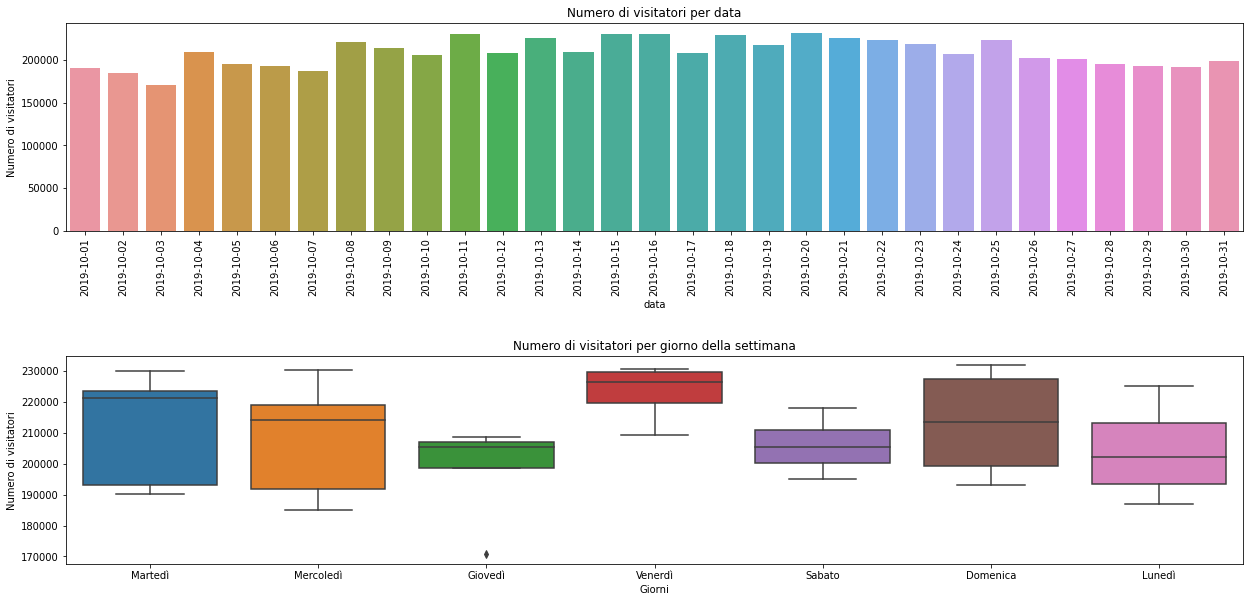

In [22]:
#Plottiamo Visitatori giornalieri
fig = plt.figure(figsize=(18, 9))

ax1 = fig.add_subplot(2, 1, 1)
sns.barplot(x=tabella_giornaliera['event_time'].dt.date,
             y='visitatori_giornalieri',
             data=tabella_giornaliera,
             ax=ax1)
plt.xticks(rotation=90)

plt.title('Numero di visitatori per data')
plt.ylabel('Numero di visitatori')
plt.xlabel('data')

ax2 = fig.add_subplot(2, 1, 2)

sns.boxplot(x=tabella_giornaliera['event_time'].dt.day_name(locale='Italian'),
            y='visitatori_giornalieri',
            data=tabella_giornaliera,
            ax=ax2)
plt.title('Numero di visitatori per giorno della settimana')
plt.ylabel('Numero di visitatori')
plt.xlabel('Giorni')
fig.tight_layout(pad=3.0)
plt.show()

Quante vendite effettua il sito?

In [23]:
#Visite giornaliere
print('Statistiche del numero di vendite giornaliere')
print('-'*50)
print(tabella_giornaliera['numero_vendite_giornaliere'].describe())
print('-'*50)
print('Statistica per data')
print('-'*50)
print(tabella_giornaliera.groupby(by=tabella_giornaliera['event_time'].dt.day_name(locale='Italian'))['numero_vendite_giornaliere'].describe())

Statistiche del numero di vendite giornaliere
--------------------------------------------------
count       31.00
mean    23,962.87
std      3,083.28
min     19,255.00
25%     21,685.50
50%     23,929.00
75%     25,617.50
max     31,394.00
Name: numero_vendite_giornaliere, dtype: float64
--------------------------------------------------
Statistica per data
--------------------------------------------------
            count      mean      std       min       25%       50%       75%  \
event_time                                                                     
Domenica     4.00 25,058.25 3,232.77 22,171.00 23,095.00 24,250.50 26,213.75   
Giovedì      5.00 22,732.80 3,618.60 19,255.00 20,099.00 21,993.00 23,999.00   
Lunedì       4.00 24,015.50 3,463.16 21,112.00 21,311.50 23,272.50 25,976.50   
Martedì      5.00 22,902.00 3,063.90 19,307.00 20,374.00 23,072.00 25,385.00   
Mercoledì    5.00 23,831.80 4,671.54 19,469.00 20,817.00 22,748.00 24,731.00   
Sabato       4.00 24,044.25 

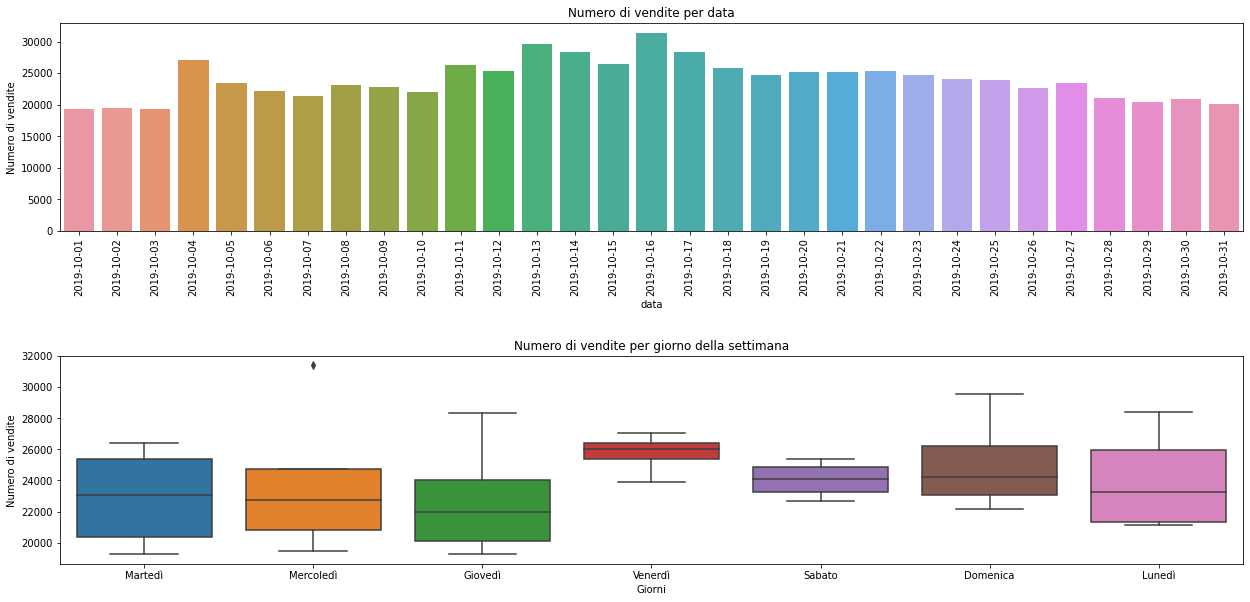

In [24]:
#Plottiamo il numero di vendite giornaliere
fig = plt.figure(figsize=(18, 9))

ax1 = fig.add_subplot(2, 1, 1)
sns.barplot(x=tabella_giornaliera['event_time'].dt.date,
             y='numero_vendite_giornaliere',
             data=tabella_giornaliera,
             ax=ax1)
plt.xticks(rotation=90)

plt.title('Numero di vendite per data')
plt.ylabel('Numero di vendite')
plt.xlabel('data')

ax2 = fig.add_subplot(2, 1, 2)

sns.boxplot(x=tabella_giornaliera['event_time'].dt.day_name(locale='Italian'),
            y='numero_vendite_giornaliere',
            data=tabella_giornaliera,
            ax=ax2)
plt.title('Numero di vendite per giorno della settimana')
plt.ylabel('Numero di vendite')
plt.xlabel('Giorni')
fig.tight_layout(pad=3.0)
plt.show()

Quale il totale delle vendite del sito?

In [25]:
#Visite giornaliere
print('Statistiche delle vendite giornaliere')
print('-'*50)
print(tabella_giornaliera['vendite_totali_giornaliere'].describe())
print('-'*50)
print('Statistica per data')
print('-'*50)
print(tabella_giornaliera.groupby(by=tabella_giornaliera['event_time'].dt.day_name(locale='Italian'))['vendite_totali_giornaliere'].describe())

Statistiche delle vendite giornaliere
--------------------------------------------------
count          31.00
mean    7,417,983.94
std       957,790.58
min     6,213,628.53
25%     6,649,835.19
50%     7,307,691.57
75%     7,888,664.02
max     9,747,239.24
Name: vendite_totali_giornaliere, dtype: float64
--------------------------------------------------
Statistica per data
--------------------------------------------------
            count         mean          std          min          25%  \
event_time                                                              
Domenica     4.00 7,477,360.28   727,391.19 6,737,660.78 7,083,260.81   
Giovedì      5.00 7,170,467.48 1,137,489.01 6,233,782.98 6,456,465.80   
Lunedì       4.00 7,539,810.99 1,381,315.12 6,348,189.06 6,530,843.44   
Martedì      5.00 7,219,398.61 1,025,462.09 6,275,964.01 6,433,438.43   
Mercoledì    5.00 7,413,163.99 1,400,503.96 6,213,628.53 6,634,069.51   
Sabato       4.00 7,282,342.67   268,120.21 6,917,602.84 7,21

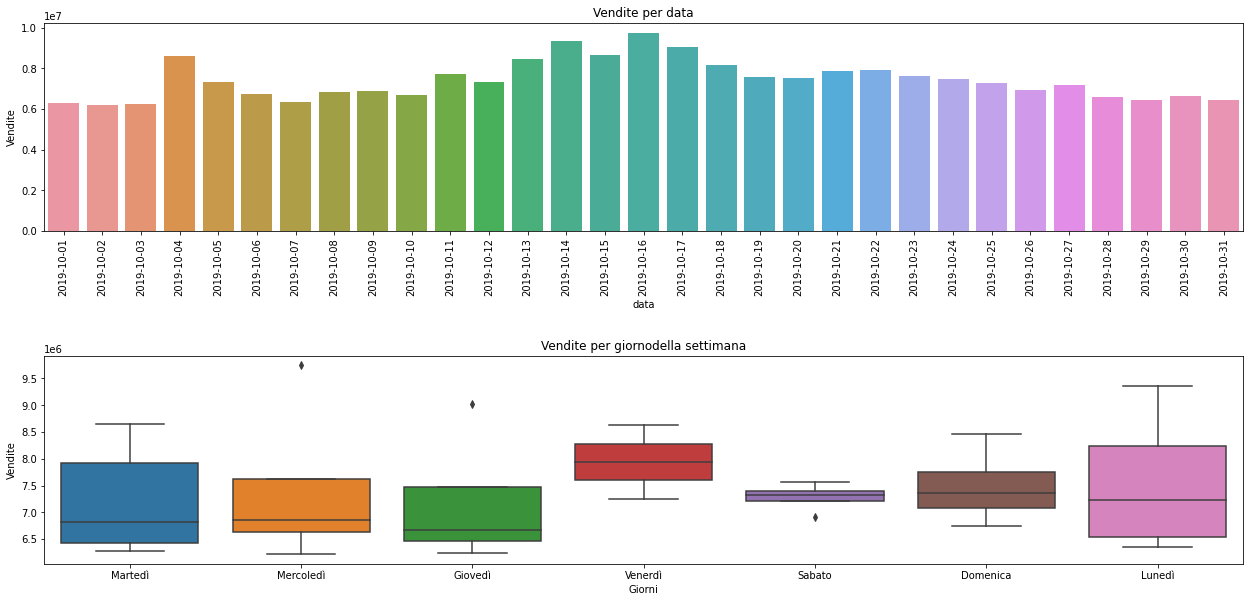

In [26]:
#Plottiamo le vendite giornaliere
fig = plt.figure(figsize=(18, 9))

ax1 = fig.add_subplot(2, 1, 1)
sns.barplot(x=tabella_giornaliera['event_time'].dt.date,
            y='vendite_totali_giornaliere',
            data=tabella_giornaliera,
            ax=ax1)
plt.xticks(rotation=90)

plt.title('Vendite per data')
plt.ylabel('Vendite')
plt.xlabel('data')

ax2 = fig.add_subplot(2, 1, 2)

sns.boxplot(x=tabella_giornaliera['event_time'].dt.day_name(locale='Italian'),
            y='vendite_totali_giornaliere',
            data=tabella_giornaliera,
            ax=ax2)
plt.title('Vendite per giornodella settimana')
plt.ylabel('Vendite')
plt.xlabel('Giorni')
fig.tight_layout(pad=3.0)
plt.show()

## **Analisi acquisti clienti**



In [27]:
#selezioniamo i clienti che hanno acquistato qualcosa
filtro_vendite = df['event_type'] == 'purchase'
tabella_clienti = df.loc[filtro_vendite].groupby(
    by=['user_id']).agg(numero_di_acquisti=('user_id', 'count'),
    totale_vendite=('price', 'sum')).reset_index()

In [28]:
tabella_clienti.head(3)

,user_id,numero_di_acquisti,totale_vendite
0,33869381,0,0.00
1,64078358,0,0.00
2,183503497,0,0.00


In [29]:
#Calcoliamo il numero di clienti che comprano qualcosa
numero_client_con_acquisti = tabella_clienti.loc[tabella_clienti.numero_di_acquisti>0,'user_id'].nunique()
print('Ci sono {:,.0f} clienti che hanno fatto almeno un acquisto ad Ottobre.'.format(numero_client_con_acquisti))

#Calculating number of purchase activities for each customer
print('-' * 50)
print('Distribuzione dei Clienti per acquisti')
print(tabella_clienti['numero_di_acquisti'].value_counts(normalize=True).head(10))
#Calculationg repeat customers number
print('-' * 50)
filtro_più_di_un_acquisto = tabella_clienti['numero_di_acquisti'] > 1
numero_di_clienti_con_più_di_un_acquisto = tabella_clienti.loc[filtro_più_di_un_acquisto].shape[0]
print('Ci sono {:,.0f} clienti che hanno fatto più di un acquisto ad Ottobr.(Repeat Customer)'.format(
    numero_di_clienti_con_più_di_un_acquisto))

Ci sono 347,118 clienti che hanno fatto almeno un acquisto ad Ottobre.
--------------------------------------------------
Distribuzione dei Clienti per acquisti
0   0.89
1   0.07
2   0.02
3   0.01
4   0.00
5   0.00
6   0.00
7   0.00
8   0.00
9   0.00
Name: numero_di_acquisti, dtype: float64
--------------------------------------------------
Ci sono 131,427 clienti che hanno fatto più di un acquisto ad Ottobr.(Repeat Customer)


In [30]:
#selezioniamo i clienti che hanno fatto almeno un acquisto
tabella_clienti = tabella_clienti.loc[tabella_clienti.numero_di_acquisti>0]
print('-' * 50)
print('Distribuzione dei Clienti per acquisti')
print(tabella_clienti['numero_di_acquisti'].value_counts(normalize=True).head(10))
print('-' * 50)

--------------------------------------------------
Distribuzione dei Clienti per acquisti
1    0.62
2    0.19
3    0.07
4    0.04
5    0.02
6    0.01
7    0.01
8    0.01
9    0.00
10   0.00
Name: numero_di_acquisti, dtype: float64
--------------------------------------------------


In [31]:
#filtraggio valori anomali
soglia_vendite = np.percentile(tabella_clienti['totale_vendite'], [5, 95])
filtro_soglia_vendite = np.logical_and(tabella_clienti['totale_vendite'] >= soglia_vendite[0],
                                       tabella_clienti['totale_vendite'] <= soglia_vendite[1])
filtro_vendite = tabella_clienti.loc[filtro_soglia_vendite]

In [32]:
filtro_vendite.head(3)

,user_id,numero_di_acquisti,totale_vendite
56,264649825,2,"1,240.04"
144,303160429,1,340.59
266,340041246,4,915.52


In [33]:
print('-' * 50)
print('Tabella clienti completa')
print(tabella_clienti.describe())

print('-' * 50)
print('Tabella clienti senza valori anomali')
print(filtro_vendite.describe())
print('-' * 50)

--------------------------------------------------
Tabella clienti completa
       numero_di_acquisti  totale_vendite
count          347,118.00      347,118.00
mean                 2.14          662.48
std                  3.64        2,074.37
min                  1.00            0.88
25%                  1.00          107.59
50%                  1.00          246.52
75%                  2.00          595.01
max                322.00      265,569.52
--------------------------------------------------
Tabella clienti senza valori anomali
       numero_di_acquisti  totale_vendite
count          312,437.00      312,437.00
mean                 1.75          419.01
std                  1.56          454.73
min                  1.00           28.51
25%                  1.00          123.50
50%                  1.00          246.52
75%                  2.00          535.15
max                 60.00        2,339.25
--------------------------------------------------


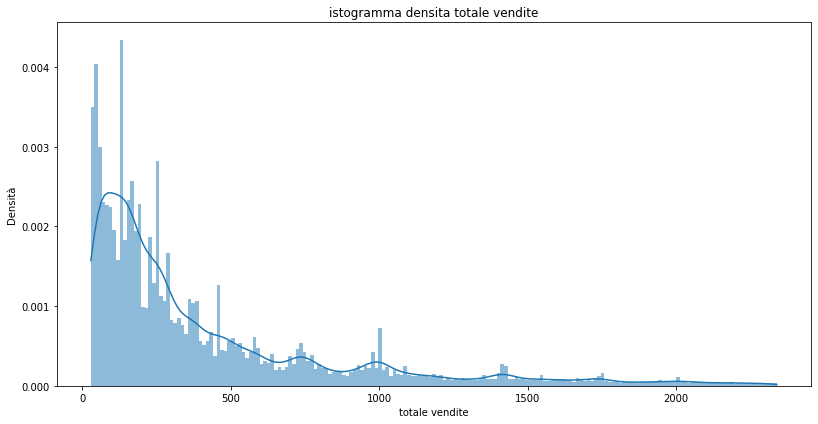

In [34]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 1, 2)
sns.histplot(filtro_vendite['totale_vendite'],ax=ax1, kde=True, stat="density", linewidth=0)
plt.title('istogramma densita totale vendite')
plt.ylabel('Densità')
plt.xlabel('totale vendite')
fig.tight_layout(pad=3.0)
plt.show()

In [35]:
#Migliori clienti

#filtro clienti con spesa superiore al %10 degli utenti
top_10per_totale_vendite = np.percentile(tabella_clienti['totale_vendite'],90)
filtro_top_10per_totale_vendite = tabella_clienti['totale_vendite']>=top_10per_totale_vendite
tabella_top_10per_totale_vendite = tabella_clienti.loc[filtro_top_10per_totale_vendite]
tabella_clienti_regolari = tabella_clienti.loc[~filtro_top_10per_totale_vendite]

#calcolo statistiche
print('Top 10% Clienti per totale vendite')
print('-'*50)
print(tabella_top_10per_totale_vendite['totale_vendite'].describe())
print('-'*50)
totale_vendite_amount = tabella_clienti['totale_vendite'].sum()
print('Totale Vendite: {:,.0f}'.format(totale_vendite_amount))
totale_vendite_amount_top10perc = tabella_top_10per_totale_vendite['totale_vendite'].sum()
print('Totale Vendite dei clienti top 10%: {:,.0f}'.format(totale_vendite_amount_top10perc))

#calculating descriptive statistics
print('Clienti regolari per totale vendite')
print('-'*50)
print(tabella_clienti_regolari['totale_vendite'].describe())
print('-'*50)
totale_vendite_amount_clienti_regolari = tabella_clienti_regolari['totale_vendite'].sum()
print('Totale Vendite dei clienti regolari: {:,.0f}'.format(totale_vendite_amount_clienti_regolari))


Top 10% Clienti per totale vendite
--------------------------------------------------
count    34,712.00
mean      3,735.44
std       5,625.45
min       1,418.31
25%       1,741.34
50%       2,339.25
75%       3,771.48
max     265,569.52
Name: totale_vendite, dtype: float64
--------------------------------------------------
Totale Vendite: 229,957,502
Totale Vendite dei clienti top 10%: 129,664,534
Clienti regolari per totale vendite
--------------------------------------------------
count   312,406.00
mean        321.03
std         314.94
min           0.88
25%          94.21
50%         205.08
75%         442.68
max       1,418.25
Name: totale_vendite, dtype: float64
--------------------------------------------------
Totale Vendite dei clienti regolari: 100,292,968


## **Analisi prodotti**


**Analisi delle categorie**

In [36]:
def estrazione_codice_categoria(testo, livello=0):
    '''
    questa funzione divide la stringa ricevuta in input facendo riferimento al carattere '.'.
    '''
    output = testo.split('.')[livello]
    return output

Recap



Estraiamo le seguenti info da category_code:

- category: categoria

- subcategory: sottocategoria


In [37]:
df['category'] = df['category_code'].apply(estrazione_codice_categoria, livello=0)
df['subcategory'] = df['category_code'].apply(estrazione_codice_categoria, livello=1)

numero_totale_di_eventi = df.shape[0]
print('Numero Totale di Eventi:{:,.0f}'.format(numero_totale_di_eventi))
print('-'*50)
numero_totale_di_visite = df['user_session'].nunique()
print('Numero totale di visite:{:,.0f}'.format(numero_totale_di_visite))
print('-'*50)
numero_totale_di_visitatori = df['user_id'].nunique()
print('Numero totale di visitatori:{:,.0f}'.format(numero_totale_di_visitatori))
print('-'*50)
numero_totale_di_categorie = df['category'].nunique()
print('Numero totale di categorie:{:,.0f}'.format(numero_totale_di_categorie))
print('-'*50)
numero_totale_di_sotto_categorie = df['subcategory'].nunique()
print('Numero totale di sotto categorie:{:,.0f}'.format(numero_totale_di_sotto_categorie))
print('-'*50)
numero_totale_di_brand = df['brand'].nunique()
print('Numero totale di brand:{:,.0f}'.format(numero_totale_di_brand))
print('-'*50)
numero_totale_di_prodotti = df['product_id'].nunique()
print('Numero totale di prodotti:{:,.0f}'.format(numero_totale_di_prodotti))

Numero Totale di Eventi:42,448,764
--------------------------------------------------
Numero totale di visite:9,244,421
--------------------------------------------------
Numero totale di visitatori:3,022,290
--------------------------------------------------
Numero totale di categorie:13
--------------------------------------------------
Numero totale di sotto categorie:57
--------------------------------------------------
Numero totale di brand:3,444
--------------------------------------------------
Numero totale di prodotti:166,794


per quantificare le performance delle singole categorie ci creiamo una tabella che contenga le metriche di nostro interesse per ciascuna categoria:


- numero di eventi
- numero di utenti
- numero di sessioni
- numero di acquisti
- totale vendite
- media vendite
- numero di sessioni con acquisti
- numero di clienti
- percentuale di conversioni

In [38]:
tabella_categorie = df.groupby(by=['category']).agg(numero_di_eventi=('category', 'count'),
                                                         numero_di_utenti=('user_id', lambda x: x.nunique()),
                                                         numero_di_sessioni=(
                                                         'user_session', pd.Series.nunique)).reset_index()
filtro_vendite = df['event_type'] == 'purchase'
category_sales_summary_table = df.loc[filtro_vendite].groupby(by=['category']).agg(
    numero_di_acquisti=('category', 'count'),
    totale_vendite=('price', 'sum'),
    media_vendite=('price', 'mean'),
    numero_di_sessioni_con_acquisti=('user_session', pd.Series.nunique),
    numero_di_clienti=('user_id', lambda x: x.nunique())).reset_index()
tabella_categorie = pd.merge(left=tabella_categorie,
                             right=category_sales_summary_table,
                             left_on='category',
                             right_on='category',
                             how='left')
tabella_categorie['percentuale_di_conversioni'] = tabella_categorie['numero_di_acquisti'] / tabella_categorie[
    'numero_di_sessioni']

In [39]:
tabella_categorie.head(3)

,category,numero_di_eventi,numero_di_utenti,numero_di_sessioni,numero_di_acquisti,totale_vendite,media_vendite,numero_di_sessioni_con_acquisti,numero_di_clienti,percentuale_di_conversioni
0,accessories,238238,50753,68100,1587,"68,783.88",43.34,1481,1134,0.02
1,apparel,1542924,259014,381510,8002,"624,937.75",78.10,7233,5186,0.02
2,appliances,4967294,544317,1055909,74996,"13,583,121.92",181.12,67302,49280,0.07


Quante eventi ha generato ogni categoria?

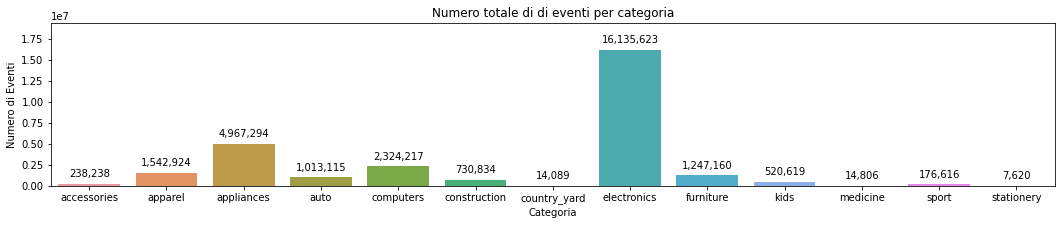

In [40]:
plt.figure(figsize=(18,3))
plot = sns.barplot(x='category', y='numero_di_eventi', data=tabella_categorie)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ',.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

plt.title('Numero totale di di eventi per categoria')
plt.xlabel('Categoria')
plt.ylabel('Numero di Eventi')
plt.ylim(0, tabella_categorie['numero_di_eventi'].max()*1.2)
plt.show()

Quanti visitatori ha avuto ogni categoria?

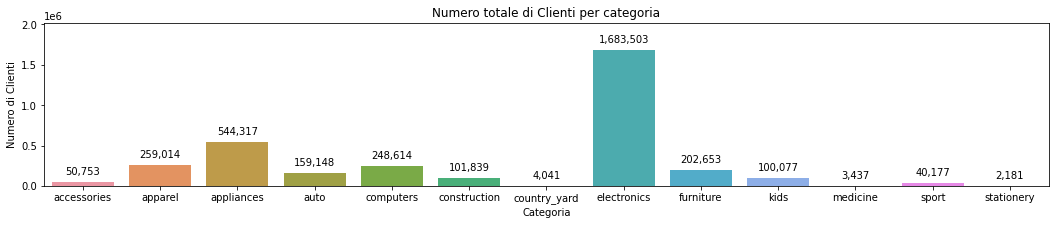

In [41]:
plt.figure(figsize=(18,3))
plot = sns.barplot(x='category', y='numero_di_utenti', data=tabella_categorie)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ',.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

plt.title('Numero totale di Clienti per categoria')
plt.xlabel('Categoria')
plt.ylabel('Numero di Clienti')
plt.ylim(0, tabella_categorie['numero_di_utenti'].max()*1.2)
plt.show()

Quali sono le percentuali di conversioni per ogni categoria?

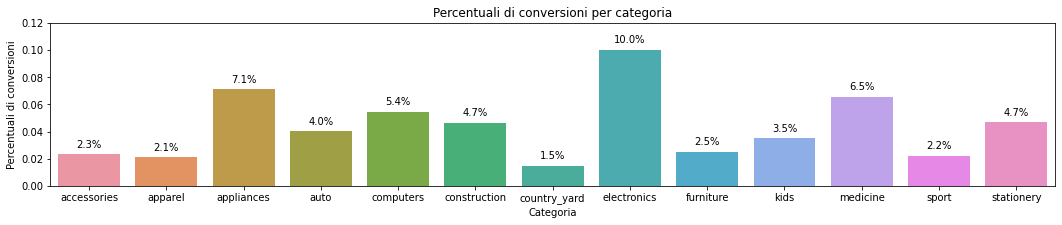

In [42]:
plt.figure(figsize=(18,3))
plot = sns.barplot(x='category', y='percentuale_di_conversioni', data=tabella_categorie)
for p in plot.patches:
    plot.annotate("{:.1%}".format(p.get_height()),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

plt.title('Percentuali di conversioni per categoria')
plt.xlabel('Categoria')
plt.ylabel('Percentuali di conversioni')
plt.ylim(0, tabella_categorie['percentuale_di_conversioni'].max() * 1.2)
plt.show()

Quale categoria di prodotti ha più interazioni?

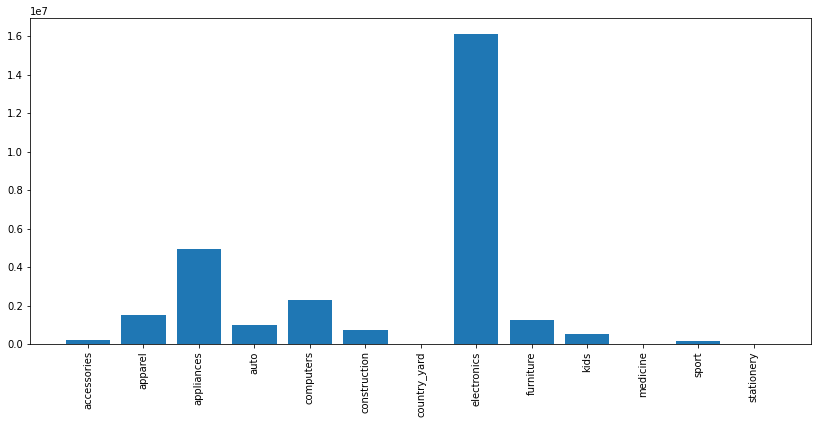

In [43]:
fig, axe = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
axe.bar(tabella_categorie.category, tabella_categorie.numero_di_eventi)
plt.xticks(rotation=90)
plt.show()

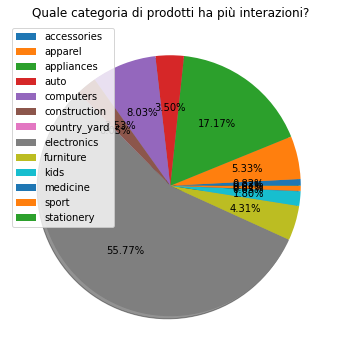

In [44]:
fig, axe = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))

axe.pie(tabella_categorie.numero_di_eventi, shadow = True, autopct = '%.2f%%')
axe.legend(tabella_categorie.category)

plt.title('Quale categoria di prodotti ha più interazioni?')
plt.axis('off')
plt.show()

passiamo alle sotto categorie

In [45]:
tabella_sottocategorie = df.groupby(by=['category', 'subcategory']).agg(
    numero_di_eventi=('category', 'count'),
    numero_di_utenti=('user_id', lambda x: x.nunique()),
    numero_di_sessioni=('user_session', pd.Series.nunique)).reset_index()

filtro_vendite = df['event_type'] == 'purchase'
tabella_sottocategorie_vendite = df.loc[filtro_vendite].groupby(by=['category', 'subcategory']).agg(
    numero_di_acquisti=('category', 'count'),
    totale_vendite=('price', 'sum'),
    media_vendite=('price', 'mean'),
    numero_di_sessioni_con_acquisti=('user_session', pd.Series.nunique),
    numero_di_clienti=('user_id', lambda x: x.nunique())).reset_index()
tabella_sottocategorie = pd.merge(left=tabella_sottocategorie,
                                              right=tabella_sottocategorie_vendite,
                                              left_on=['category', 'subcategory'],
                                              right_on=['category', 'subcategory'],
                                              how='left')

tabella_sottocategorie['percentuale_di_conversioni'] = tabella_sottocategorie['numero_di_acquisti']/\
                                                        tabella_sottocategorie['numero_di_sessioni']

tabella_sottocategorie['category_subcategory'] = tabella_sottocategorie['category'] + '-' +\
                                                             tabella_sottocategorie['subcategory']

tabella_sottocategorie_ordinata = tabella_sottocategorie.sort_values(by='numero_di_eventi', ascending=False)

Quanti eventi ha generato ogni sotto categoria?

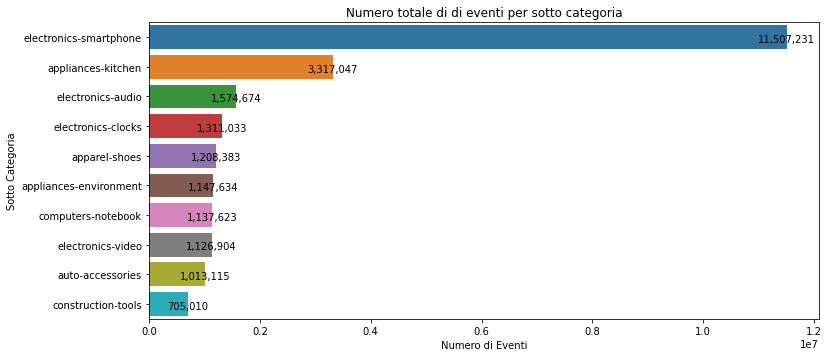

In [46]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,1,1)
plot = sns.barplot(x='numero_di_eventi', y='category_subcategory', data=tabella_sottocategorie_ordinata.head(10), ax=ax1)

for p in plot.patches:
    plot.annotate(format(p.get_width(), ',.0f'),
                  (p.get_x()+p.get_width(), p.get_y() + p.get_height() ),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')
    
plt.title('Numero totale di di eventi per sotto categoria')
plt.ylabel('Sotto Categoria')
plt.xlabel('Numero di Eventi')
plt.show()

Quante visitatori ha avuto ogni sotto categoria?

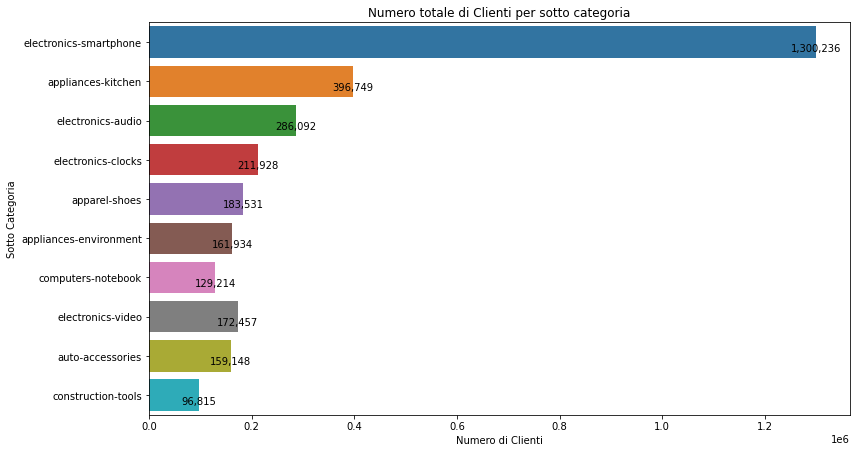

In [47]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,1,1)
plot = sns.barplot(x='numero_di_utenti', y='category_subcategory', data=tabella_sottocategorie_ordinata.head(10), ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_width(), ',.0f'),
                  (p.get_x()+p.get_width(), p.get_y() + p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

plt.title('Numero totale di Clienti per sotto categoria')
plt.ylabel('Sotto Categoria')
plt.xlabel('Numero di Clienti')
plt.tight_layout()
plt.show()

Quali sono i maggiori conversion rate per ogni sotto categoria?

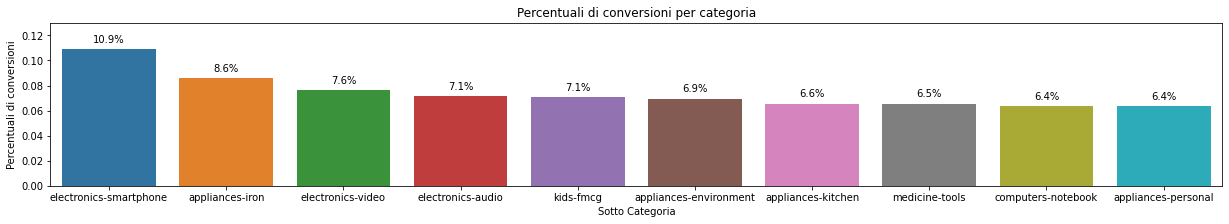

In [48]:
plt.figure(figsize=(21,3))
plot = sns.barplot(x='category_subcategory',y='percentuale_di_conversioni',data=tabella_sottocategorie_ordinata.sort_values(by='percentuale_di_conversioni',ascending=False).head(10))

for p in plot.patches:
    plot.annotate("{:.1%}".format(p.get_height()),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

plt.title('Percentuali di conversioni per categoria')
plt.xlabel('Sotto Categoria')
plt.ylabel('Percentuali di conversioni')
plt.ylim(0,tabella_categorie['percentuale_di_conversioni'].max()*1.3)
plt.show()

Quali sono i peggiori conversion rate per ogni sotto categoria?

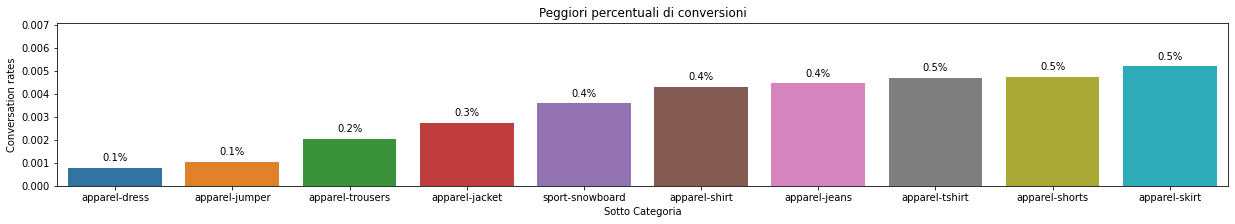

In [49]:
plt.figure(figsize=(21,3))
plot = sns.barplot(x='category_subcategory',y='percentuale_di_conversioni',data=tabella_sottocategorie_ordinata.sort_values(by='percentuale_di_conversioni',ascending=True).head(10))

for p in plot.patches:
    plot.annotate("{:.1%}".format(p.get_height()),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

plt.title('Peggiori percentuali di conversioni')
plt.ylabel('Conversation rates')
plt.xlabel('Sotto Categoria')

plt.ylim(0,plot.get_ybound()[1]*1.3)
plt.show()


In [50]:
#cancello per liberare memoria
del tabella_giornaliera
del filtro_vendite
del tabella_categorie
del tabella_clienti
del tabella_sottocategorie_vendite
del tabella_sottocategorie
del tabella_sottocategorie_ordinata
del tabella_top_10per_totale_vendite
del tabella_clienti_regolari

Quale Brand ha più visite?

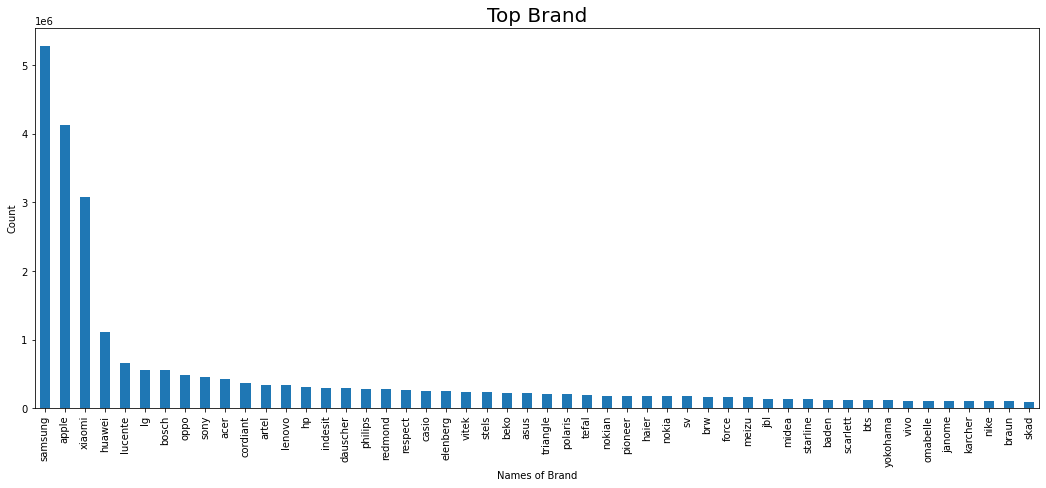

In [51]:
df['brand'].value_counts().head(50).plot.bar(figsize = (18, 7))
plt.title('Top Brand', fontsize = 20)
plt.xlabel('Names of Brand')
plt.ylabel('Count')
plt.show()

Quale articolo viene acquistato di più dai clienti?

In [52]:
# event_type = "purchase"
purchase = df.loc[df['event_type'] == 'purchase']
purchase = purchase.dropna(axis='rows')
purchase_product=purchase.groupby('product_id')['product_id'].agg(['count']).sort_values('count', ascending=False)

print(purchase_product.head())

            count
product_id       
1004856     28944
1004767     21806
1004833     12697
1005115     12543
4804056     12381


Quale brand i clienti comprano?

In [53]:
top_sellers = purchase.groupby('brand')['brand'].agg(['count']).sort_values('count', ascending=False)
top_sellers.head(20)

,count
brand,
samsung,171706
apple,142577
xiaomi,46595
huawei,23294
oppo,10891
lg,7831
acer,6882
elenberg,5435
indesit,5023


In [54]:
#cancello per liberare memoria
del purchase
del purchase_product
del top_sellers

## Analisi del tipo di eventi

si ricorda
Colonna **event_type**: Representail tipo di evento.

In [55]:
df.groupby("event_type")["event_type"].count().sort_values(ascending=False)

event_type
view        40779399
cart          926516
purchase      742849
Name: event_type, dtype: int64

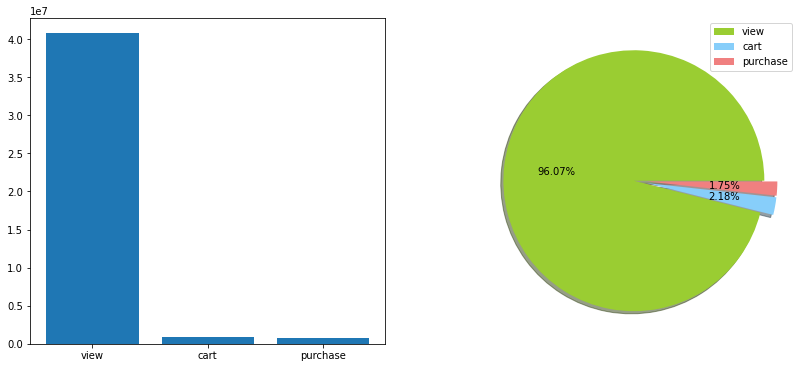

In [56]:
colors = ['yellowgreen', 'lightskyblue','lightcoral']
explode = [0, 0.1,0.1]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].bar(df["event_type"].value_counts().index,df["event_type"].value_counts().values)
axes[1].pie(df["event_type"].value_counts().values, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
axes[1].legend(df["event_type"].value_counts().index)
plt.show()

## **Pulitura dei dati**



**Si sceglie di escludere i prodotti solo visualizzati**

In [57]:
# recupero gli indici relativi alle sole visualizzazioni
index_View = df[ df['event_type'] == "view" ].index
# cancello i relativi dati dal dataset
df = df.drop(index_View)

In [58]:
df.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category,subcategory
162,2019-10-01 00:02:14,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,electronics,smartphone
308,2019-10-01 00:04:37,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,electronics,smartphone
331,2019-10-01 00:05:14,cart,5100816,2053013553375346967,NaN,xiaomi,29.51,550121407,6f623695-9581-4633-813f-825b8760c7ae,NaN,NaN


In [59]:
df.groupby("event_type")["event_type"].count().sort_values(ascending=False)

event_type
cart        926516
purchase    742849
view             0
Name: event_type, dtype: int64

rimuoviamo i parametri che ci sono poco utili in questa fase

rimuoviamo la colonna 'user_id'


In [60]:
df = df.drop(columns=['user_id'])

rimuoviamo la colonna 'user_session'

In [61]:
df = df.drop(columns=['user_session'])

Ora rimuoviamo la colonna "category_code", poiché contiene molti dati mancanti. Inoltre, è solo una tassonomia della categoria del prodotto ed è già presente una colonna "category_id" che rappresenta l'ID della categoria del prodotto. Cioè, le 2 colonne forniscono le stesse informazioni.


Ma prima di eliminarlo definitivamente, inseriamo i valori mancanti ed estraiamo le informazioni:

In [62]:
df.dtypes

event_time       datetime64[ns]
event_type             category
product_id             category
category_id            category
category_code          category
brand                  category
price                   float64
category                 object
subcategory              object
dtype: object

In [63]:
#trasformiamo il categorical in stringa per poter aggiungere ilvalore 'NaN.NaN'
df['category_code'] = df['category_code'].astype(str)

In [64]:
df.update(df['category_code'].fillna('NaN.NaN'))

In [65]:
df['category_code'] = df['category_code'].astype('category')

In [66]:
df.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,category,subcategory
162,2019-10-01 00:02:14,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,electronics,smartphone
308,2019-10-01 00:04:37,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,electronics,smartphone
331,2019-10-01 00:05:14,cart,5100816,2053013553375346967,NaN.NaN,xiaomi,29.51,NaN,NaN


In [67]:
#colonna 'category_code'
print(df["category_code"].value_counts())

electronics.smartphone          887783
NaN.NaN                         279151
electronics.audio.headphone      81646
electronics.video.tv             57789
electronics.clocks               38250
                                 ...  
apparel.skirt                        4
apparel.shorts                       2
apparel.jumper                       2
construction.tools.soldering         1
apparel.jacket                       1
Name: category_code, Length: 122, dtype: int64



ricalcoliamo:

- category: categoria

- subcategory: sottocategoria


In [68]:
df['category'] = df['category_code'].apply(estrazione_codice_categoria, livello=0)
df['subcategory'] = df['category_code'].apply(estrazione_codice_categoria, livello=1)

In [69]:
print(df["category"].nunique())
df["category"].value_counts()

14


electronics     1097233
NaN              279151
appliances       167358
computers         55289
auto              19687
construction      18144
furniture         10708
kids               8134
apparel            8028
sport              2292
accessories        2136
medicine            832
stationery          240
country_yard        133
Name: category, dtype: int64

In [70]:
print(df["subcategory"].nunique())
df["subcategory"].value_counts()

57


smartphone        887783
NaN               279151
kitchen           109357
audio              88271
video              58018
environment        42605
clocks             38250
notebook           31217
accessories        19687
tools              18634
tablet             14743
peripherals        11319
telephone           9080
iron                7748
shoes               7082
desktop             6463
components          5862
personal            5246
sewing_machine      4226
living_room         4087
bedroom             3479
carriage            3253
bag                 1797
toys                1563
bicycle             1531
skates              1426
camera              1088
ironing_board       1018
fmcg                 866
ebooks               770
trainer              721
dolls                549
costume              489
swing                477
wallet               310
bathroom             260
cartrige             240
jeans                140
underwear             97
lawn_mower            94


In [71]:
df = df.drop(columns=['category_code'])

In [72]:
df.head(3)

,event_time,event_type,product_id,category_id,brand,price,category,subcategory
162,2019-10-01 00:02:14,purchase,1004856,2053013555631882655,samsung,130.76,electronics,smartphone
308,2019-10-01 00:04:37,purchase,1002532,2053013555631882655,apple,642.69,electronics,smartphone
331,2019-10-01 00:05:14,cart,5100816,2053013553375346967,xiaomi,29.51,NaN,NaN


In [73]:
sum_result = df.isna().sum(axis=0).sort_values(ascending=False)
missing_values_columns = sum_result[sum_result > 0]
print('ci sono %s colonne con elementi mancanti : \n%s' % (missing_values_columns.count(), [(index, value) for (index, value) in missing_values_columns.iteritems()]))

ci sono 1 colonne con elementi mancanti : 
[('brand', 77111)]


In [74]:
nulls = df.isnull().sum()
print(nulls)
print(f'numero totale di elementi mancanti {nulls.sum()}')

event_time         0
event_type         0
product_id         0
category_id        0
brand          77111
price              0
category           0
subcategory        0
dtype: int64
numero totale di elementi mancanti 77111


- **Pulizia dei dati assenti**


Un 'brand' è molto importante per la decisione di acquisto di un prodotto, non possiamo escluderlo. In questo modo, sceglieremo di sostituirli con un valore fisso, ad esempio "no brand".

In [75]:
df['brand'] = df['brand'].astype('string')

In [76]:
df.update(df['brand'].fillna('no brand'))

In [77]:
df['brand'] = df['brand'].astype('category')

In [78]:
df.head()

,event_time,event_type,product_id,category_id,brand,price,category,subcategory
162,2019-10-01 00:02:14,purchase,1004856,2053013555631882655,samsung,130.76,electronics,smartphone
308,2019-10-01 00:04:37,purchase,1002532,2053013555631882655,apple,642.69,electronics,smartphone
331,2019-10-01 00:05:14,cart,5100816,2053013553375346967,xiaomi,29.51,NaN,NaN
379,2019-10-01 00:06:02,purchase,5100816,2053013553375346967,xiaomi,29.51,NaN,NaN
442,2019-10-01 00:07:07,purchase,13800054,2053013557418656265,santeri,54.42,furniture,bathroom


In [79]:
print(df.isnull().sum().sum())

0


**Feature Engineering**

Aggiunta / costruzione di nuove features al dataset:


- event_weekday: giorno della settimana dell'evento
- giorno
- ora
- minuto
- secondo
- is_purchased: se l'articolo inserito nel carrello é stato acquistato

In [80]:
#giorno della settimana
df['event_weekday'] = df['event_time'].dt.weekday

In [81]:
df.head(3)

,event_time,event_type,product_id,category_id,brand,price,category,subcategory,event_weekday
162,2019-10-01 00:02:14,purchase,1004856,2053013555631882655,samsung,130.76,electronics,smartphone,1
308,2019-10-01 00:04:37,purchase,1002532,2053013555631882655,apple,642.69,electronics,smartphone,1
331,2019-10-01 00:05:14,cart,5100816,2053013553375346967,xiaomi,29.51,NaN,NaN,1


In [82]:
#anno non importa perché sono tutti dello stesso anno.
#anche il mese ha importanza perché stiamo analizzando un singolo mese.

df.event_time = pd.to_datetime(df.event_time, utc=True)

df['day'] = df['event_time'].dt.day
df['hour'] = df['event_time'].dt.hour
df['minute'] = df['event_time'].dt.minute
df['seconds'] = df['event_time'].dt.second

In [83]:
df.head(3)

,event_time,event_type,product_id,category_id,brand,price,category,subcategory,event_weekday,day,hour,minute,seconds
162,2019-10-01 00:02:14+00:00,purchase,1004856,2053013555631882655,samsung,130.76,electronics,smartphone,1,1,0,2,14
308,2019-10-01 00:04:37+00:00,purchase,1002532,2053013555631882655,apple,642.69,electronics,smartphone,1,1,0,4,37
331,2019-10-01 00:05:14+00:00,cart,5100816,2053013553375346967,xiaomi,29.51,NaN,NaN,1,1,0,5,14


In [84]:
#ora possiamo escludere 'event_time' poichè abbiamo gia estratto i dati di nostro interesse
df = df.drop(columns=['event_time'])

In [85]:
df.head(3)

,event_type,product_id,category_id,brand,price,category,subcategory,event_weekday,day,hour,minute,seconds
162,purchase,1004856,2053013555631882655,samsung,130.76,electronics,smartphone,1,1,0,2,14
308,purchase,1002532,2053013555631882655,apple,642.69,electronics,smartphone,1,1,0,4,37
331,cart,5100816,2053013553375346967,xiaomi,29.51,NaN,NaN,1,1,0,5,14


In [86]:
# se l'articolo inserito nel carrello è stato acquistato

df["is_purchased"] = np.where(df["event_type"]=="purchase",True,False)

In [87]:
df.head(3)

,event_type,product_id,category_id,brand,price,category,subcategory,event_weekday,day,hour,minute,seconds,is_purchased
162,purchase,1004856,2053013555631882655,samsung,130.76,electronics,smartphone,1,1,0,2,14,True
308,purchase,1002532,2053013555631882655,apple,642.69,electronics,smartphone,1,1,0,4,37,True
331,cart,5100816,2053013553375346967,xiaomi,29.51,NaN,NaN,1,1,0,5,14,False


In [88]:
df.dtypes

event_type       category
product_id       category
category_id      category
brand            category
price             float64
category           object
subcategory        object
event_weekday       int64
day                 int64
hour                int64
minute              int64
seconds             int64
is_purchased         bool
dtype: object

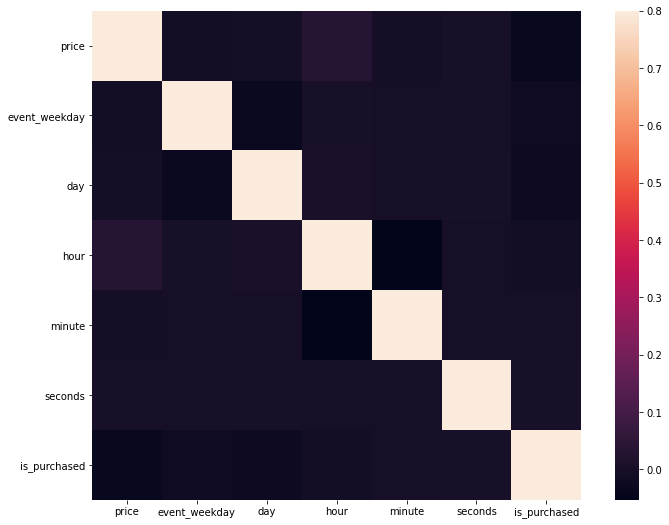

In [89]:
#mappa di correlazione
corr_mat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=0.8, square=True)
plt.show()